In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats, integrate

In [2]:
np.random.seed(sum(map(ord, "线性关系图表的绘制")))

In [4]:
tips = sb.load_dataset("tips")

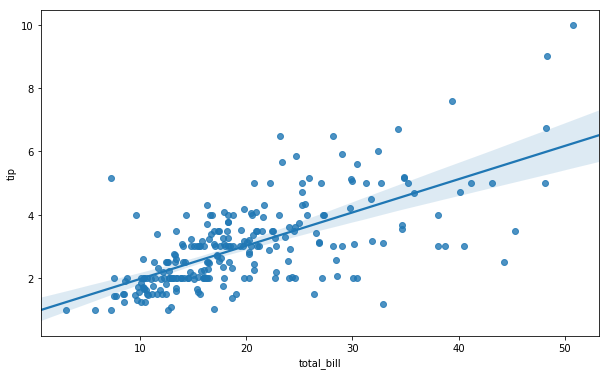

In [6]:
### 使用regplot绘制线性回归图表
plt.figure(figsize=(10,6))
#绘制total_bill和tip之间的线性关系图表
sb.regplot(x="total_bill", y="tip", data=tips)

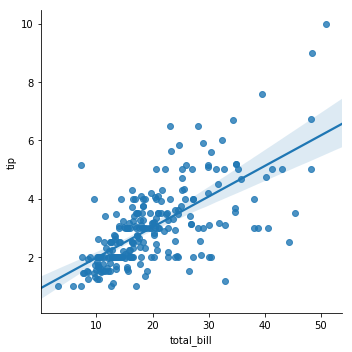

In [7]:
#可以使用lmplot完成相同的线性拟合的功能
sb.lmplot(x="total_bill", y="tip", data=tips)

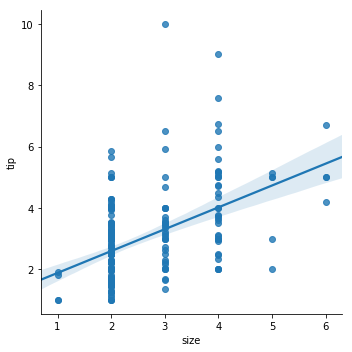

In [8]:
sb.lmplot(x="size", y="tip", data=tips)

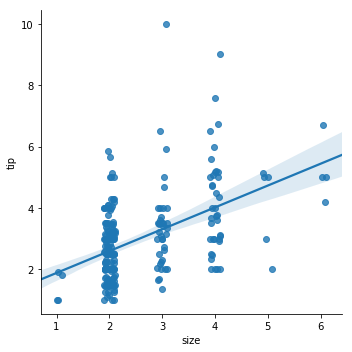

In [9]:
#通过关键字参数x_jitter增加随机因子，但是不会影响线性拟合
sb.lmplot(x="size", y="tip", data=tips, x_jitter=.1)

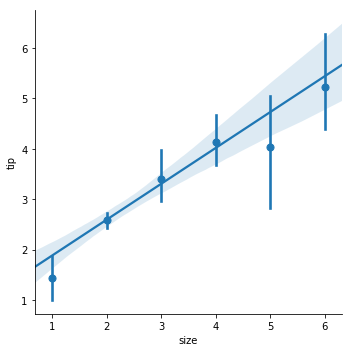

In [10]:
#沿着置信区间绘制中心趋势的估计，通过关键字参数x_estimator
sb.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

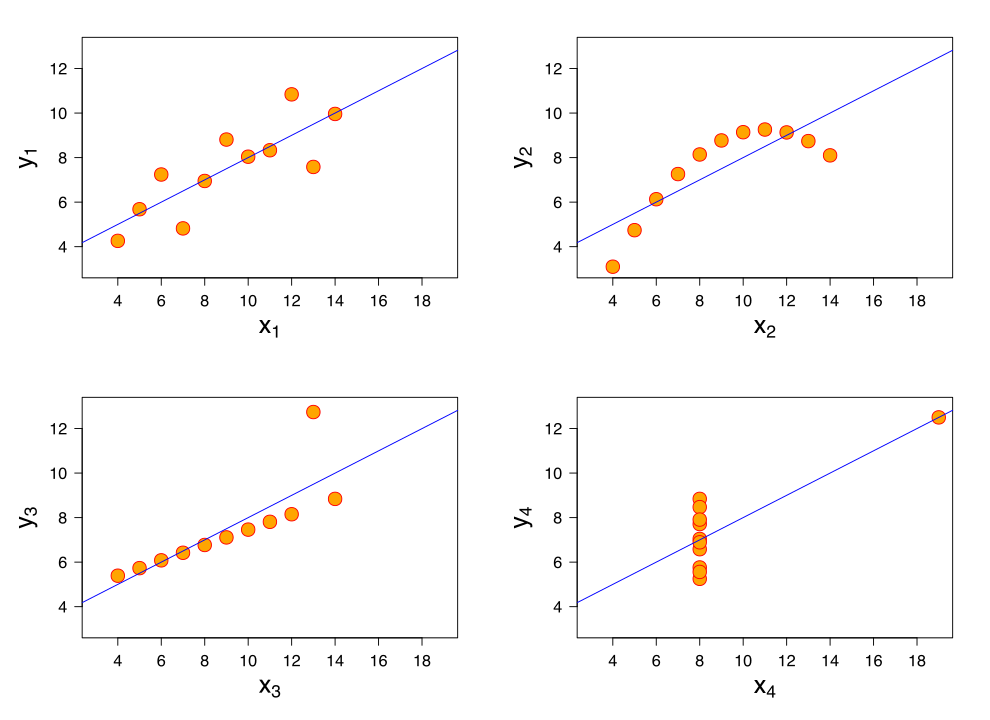

In [11]:
#加载一个测试数据集anscombe,四类数据集1.符合线性分布的数据集。2.符合二次分布的数据集。3.带有离群点的数据集。4.二分类的数据集
#更多信息请查看官网：https://en.wikipedia.org/wiki/Anscombe%27s_quartet
from IPython.display import Image
Image("Anscombe's_quartet_3.svg.png")

In [12]:
anscombe = sb.load_dataset("anscombe")

In [13]:
anscombe.tail(20)

,dataset,x,y
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42
32,III,5.0,5.73
33,IV,8.0,6.58


In [24]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
dataset    44 non-null object
x          44 non-null float64
y          44 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


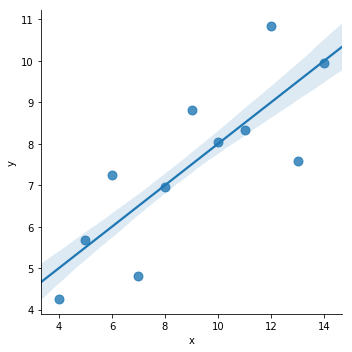

In [14]:
#使用lmplot方法绘制anscombe中的第一类数据集的线性拟合
#通过data关键字参数提供数据
sb.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=50, scatter_kws={"s": 80})

In [29]:
print(help(sb.lmplot))

Help on function lmplot in module seaborn.regression:

lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, size=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    comparison, followed by ``col`` and ``row``. Howe

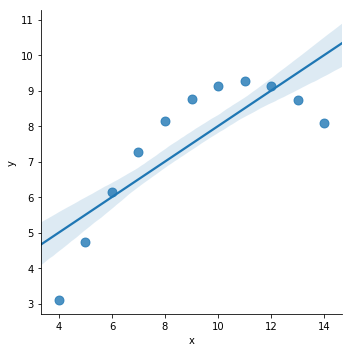

In [15]:
#再次使用lmplot绘制第二类数据,第二类数据不是一个线性的分布，因此使用线性的拟合方法效果肯定是不好的
sb.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),ci=50, scatter_kws={"s": 80})

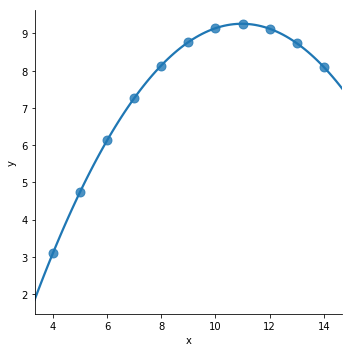

In [16]:
#使用多项式方法拟合数据,通过关键字参数order指定多项式的次数
sb.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),order=2, scatter_kws={"s": 80})

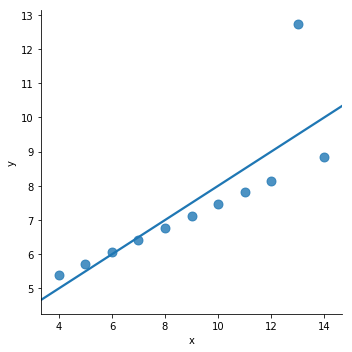

In [17]:
#对于拥有噪声数据的可视化，线性拟合会受到噪声数据的影响,从绘制的图标可以看到，噪声数据会使得拟合直线发生偏移
sb.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),ci=None, scatter_kws={"s": 80})

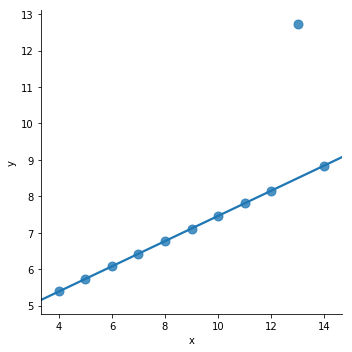

In [18]:
#对于拥有离群数据的绘制，可以使用robust关键字参数来进行修正，其内部实现采用不同的损失函数来降低离群点的权重，达到修正的目的
sb.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=True, ci=None, scatter_kws={"s": 80})

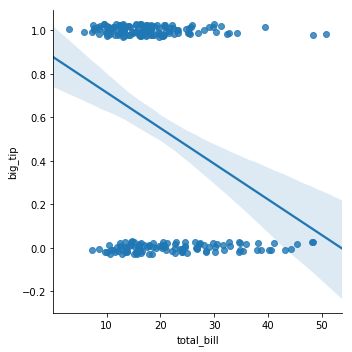

In [19]:
#对于二分类的数据使用线性拟合显然是不合适的
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sb.lmplot(x="total_bill", y="big_tip", data=tips,y_jitter=.03)

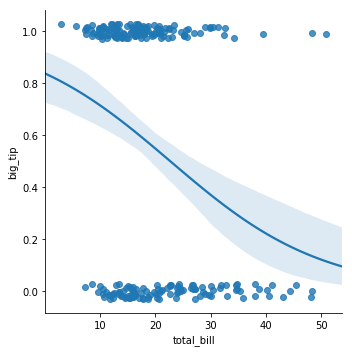

In [20]:
#可以增加logistic关键字参数，让其变成逻辑回归二分类
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sb.lmplot(x="total_bill", y="big_tip", data=tips,y_jitter=.03,logistic=True)

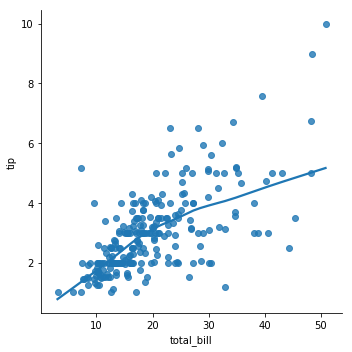

In [21]:
#另外一种方法是使用lowess平滑,使用lowess关键字参数，使其更加贴合数据走势
#lowess更多信息请参考：https://en.wikipedia.org/wiki/Local_regression
sb.lmplot(x="total_bill", y="tip", data=tips, lowess=True)

#### 考虑多个变量参数

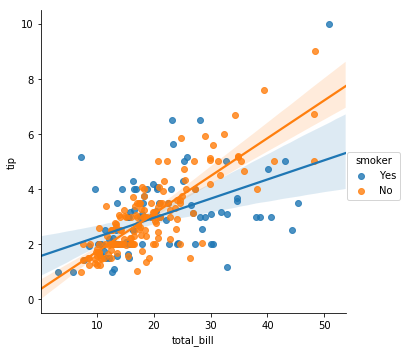

In [23]:
#通过关键字参数指定分类，不同的分类用不同的颜色，每种分类单独线性拟合
sb.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

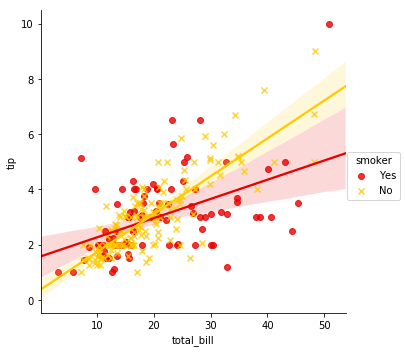

In [24]:
#为了方便观察，可以使用markers关键字参数将不同的类别赋予不同的显示形式
sb.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,markers=["o", "x"], palette="hot")

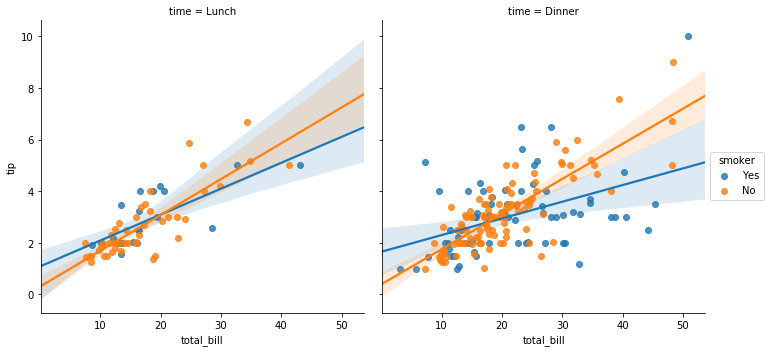

In [25]:
#要再增加一个观察的维度，可以使用关键字参数col指定
sb.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

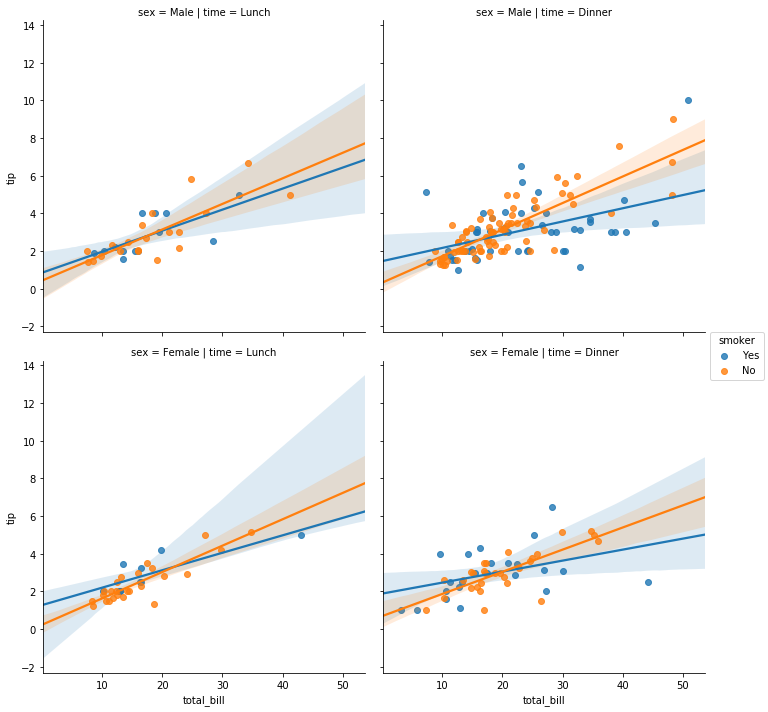

In [26]:
#在增加一个观察的维度，使用row关键字参数
sb.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips)

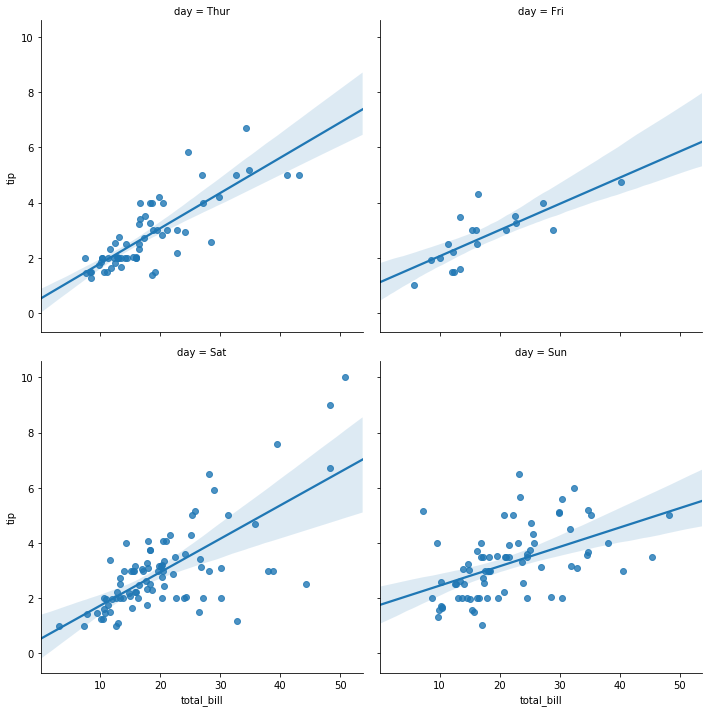

In [28]:
#对于lmplot不同面的图表的大小可以通过size和aspect参数来控制
sb.lmplot(x="total_bill", y="tip", col="day", data=tips, col_wrap=2, size=5)

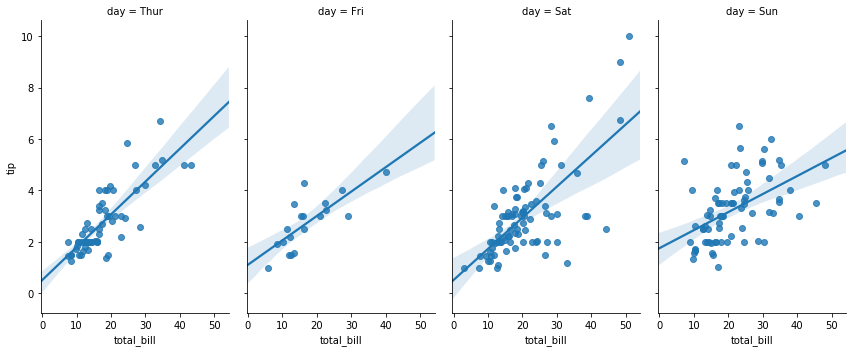

In [29]:
#指定宽高比
sb.lmplot(x="total_bill", y="tip", col="day", data=tips, aspect=.6)